In [4]:
# Setup
import importlib
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz

import sccoda
#import sccoda.datasets as scd
print("hello")

hello


In [24]:
#raw_df = pd.read_table("/data/keeyoung/gy_RNA/scCODA/scCODA_stromal_Myofibroblasts.txt", sep='\t', header=0)
raw_df = pd.read_table("/data/keeyoung/gy_RNA/scCODA/scCODA_nearest_CMS4_iCMS_try2.txt", sep='\t', header=0)

In [25]:
df = raw_df.drop(['Mixture','nearest'], axis=1)
df.columns[0]
df.rename(columns = {"iCMS":"nearest_CMS4"}, inplace=True)
df

,nearest_CMS4,CMS2,CMS3,CMS1,CMS4,Gobletcells,Stem,Intermediate,MEnterocytestype2,MEnterocytestype1,...,T_Tfollicularhelpercells,T_CD4+Tcells,T_Thelper17cells,T_gammadeltaTcells,T_NKcells,B_IgG+Plasma,B_CD19+CD20+B,B_IgA+Plasma,B_Unknown,Mastcells
0,iCMS2,238.228381,95.381692,0,0.753809,0.000000,0.000000,30.681866,0.000000,0.000000,...,0.000000,0.000000,69.834859,20.105102,0.000000,33.183146,51.966371,0.000000,10.237835,1.512182
1,iCMS2,263.198050,113.256616,0,0.350798,0.000000,0.000000,33.961000,0.000000,0.780598,...,8.287261,9.854557,68.085756,15.201017,3.442547,37.324065,58.925022,0.000000,5.329900,1.253195
2,iCMS2,188.327137,90.073712,0,0.000000,0.000000,0.000000,37.353835,0.000000,0.000000,...,14.351392,2.795691,65.921699,9.977651,20.621873,25.763236,64.838884,0.000000,8.436904,0.000000
3,iCMS2,175.860496,85.317148,0,0.000000,0.000000,0.000000,25.078972,0.000000,0.895751,...,0.000000,11.827852,48.307118,45.179171,12.717737,23.734315,70.585681,0.000000,4.271603,0.000000
4,iCMS2,183.252484,98.402353,0,0.614134,0.000000,0.000000,53.692478,0.000000,0.000000,...,0.000000,9.198923,69.641521,18.442927,2.746877,39.927961,46.576572,0.000000,0.000000,0.000000
5,iCMS2,209.143269,132.507607,0,1.761561,3.048426,46.753922,3.502793,0.000000,0.000000,...,0.000000,0.000000,56.505428,24.942996,21.745123,53.447861,41.212830,0.000000,10.370642,0.537252
6,iCMS2,170.557808,112.603066,0,0.182954,0.216189,0.000000,9.492787,0.000000,0.000000,...,5.423682,5.566264,85.574749,8.111237,0.000000,36.638516,76.113179,0.000000,10.044733,0.379799
7,iCMS2,111.975988,133.889045,0,0.000000,3.416388,71.779384,0.000000,1.061214,0.000000,...,0.000000,2.871780,51.754346,31.841602,0.000000,41.024043,62.302150,3.610666,2.862223,3.002123
8,iCMS3,130.440323,221.950400,0,1.289889,11.128961,50.274672,0.000000,1.487722,0.000000,...,13.363172,30.919880,43.264381,20.018852,3.600688,44.028526,38.692203,6.782706,0.000000,2.181934
9,iCMS3,89.963980,238.564186,0,0.000000,6.944384,31.655752,0.000000,1.908603,0.000000,...,1.507153,0.000000,39.425358,11.538454,0.525148,52.523673,74.954695,3.449043,0.000000,2.489286


In [15]:
df_dat = dat.from_pandas(df, covariate_columns=["nearest_CMS4"])

In [16]:
df_dat.obs["nearest_CMS4"]

0     iCMS2
1     iCMS2
2     iCMS2
3     iCMS2
4     iCMS2
5     iCMS2
6     iCMS2
7     iCMS2
8     iCMS3
9     iCMS3
10    iCMS3
11    iCMS3
12    iCMS3
13    iCMS3
Name: nearest_CMS4, dtype: object

<AxesSubplot:xlabel='Cell type', ylabel='Proportion'>

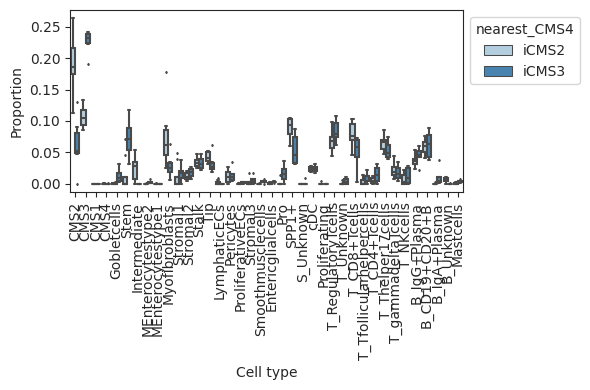

In [17]:
data_iCMS = df_dat[df_dat.obs["nearest_CMS4"].isin(["iCMS2","iCMS3"])]
viz.boxplots(data_iCMS, feature_name="nearest_CMS4")

In [18]:
model_iCMS = mod.CompositionalAnalysis(data_iCMS, formula="nearest_CMS4", reference_cell_type="automatic")
sim_results_iCMS = model_iCMS.sample_hmc()

Trying to set attribute `.X` of view, copying.


Automatic reference selection! Reference cell type set to cDC
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [06:42<00:00, 49.63it/s]


MCMC sampling finished. (503.785 sec)
Acceptance rate: 41.9%


In [19]:
#sim_results_CMS3.summary()
#print(sim_results_CMS3.credible_effects())
path_iCMS="/data/keeyoung/gy_RNA/scCODA/CMS4_nearest_iCMS2_iCMS3_try2"
sim_results_iCMS.save(path_iCMS)


# loading
with open(path_iCMS, "rb") as f:
    sim_results_iCMS = pkl.load(f)
    
#sim_results_2.summary()

In [20]:
sim_results_iCMS.summary()
print(sim_results_iCMS.credible_effects())

Compositional Analysis summary:

Data: 14 samples, 38 cell types
Reference index: 23
Formula: nearest_CMS4

Intercepts:
                          Final Parameter  Expected Sample
Cell Type                                                 
CMS2                                3.006       193.377892
CMS3                                2.455       111.457825
CMS1                               -5.709         0.031734
CMS4                               -1.749         1.664702
Gobletcells                        -1.707         1.736109
Stem                               -1.462         2.218090
Intermediate                        0.587        17.212679
MEnterocytestype2                  -2.538         0.756272
MEnterocytestype1                  -2.820         0.570436
Myofibroblasts                      1.921        65.342735
Stromal1                           -1.001         3.517133
Stromal2                            0.531        16.275262
Stalk                               1.325        36.00